In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import nltk


In [2]:
import re
from nltk.corpus  import wordnet
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])
df_0=df[df["label"]==0].sample(7000)
df_1=df[df["label"]==1].sample(7000)


C:\Users\zas\AppData\Local\Temp\ipykernel_3532\1068681359.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])


In [4]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [5]:
data=pd.concat([df_0,df_1])
data.head()

,title,text,label
31261,Syrian government forces used chemical weapons...,GENEVA (Reuters) - Government forces have used...,0
50321,Iraq orders arrest of Kurdistan vice president...,BAGHDAD (Reuters) - Iraq s Supreme Justice Cou...,0.0
41299,17 Great Stories That Have Nothing to Do With ...,"Welcome to Our Picks, a guide to the best stuf...",0
48699,Toby Keith: I Wonât âApologizeâ for Play...,Country artist Toby Keith will not back out of...,0
69634,U.S. attorney general Sessions evasive on Russ...,WASHINGTON (Reuters) - U.S. Attorney General J...,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 31261 to 63094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   13896 non-null  object
 1   text    13993 non-null  object
 2   label   14000 non-null  object
dtypes: object(3)
memory usage: 437.5+ KB


In [7]:
data.isna().sum()

title    104
text       7
label      0
dtype: int64

In [8]:
len(data.columns)

3

In [9]:
data.dropna(inplace=True)
data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [10]:
data.reset_index(inplace=True)
data.head()

,index,title,text,label
0,31261,Syrian government forces used chemical weapons...,GENEVA (Reuters) - Government forces have used...,0
1,50321,Iraq orders arrest of Kurdistan vice president...,BAGHDAD (Reuters) - Iraq s Supreme Justice Cou...,0.0
2,41299,17 Great Stories That Have Nothing to Do With ...,"Welcome to Our Picks, a guide to the best stuf...",0
3,48699,Toby Keith: I Wonât âApologizeâ for Play...,Country artist Toby Keith will not back out of...,0
4,69634,U.S. attorney general Sessions evasive on Russ...,WASHINGTON (Reuters) - U.S. Attorney General J...,0


In [11]:
data.shape

(13889, 4)

In [12]:
X=data.drop("label",axis=1)
y=data.label

In [13]:
y.head()

0      0
1    0.0
2      0
3      0
4      0
Name: label, dtype: object

In [14]:
messages = X.copy()

In [15]:
messages.head()

,index,title,text
0,31261,Syrian government forces used chemical weapons...,GENEVA (Reuters) - Government forces have used...
1,50321,Iraq orders arrest of Kurdistan vice president...,BAGHDAD (Reuters) - Iraq s Supreme Justice Cou...
2,41299,17 Great Stories That Have Nothing to Do With ...,"Welcome to Our Picks, a guide to the best stuf..."
3,48699,Toby Keith: I Wonât âApologizeâ for Play...,Country artist Toby Keith will not back out of...
4,69634,U.S. attorney general Sessions evasive on Russ...,WASHINGTON (Reuters) - U.S. Attorney General J...


In [16]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps=PorterStemmer()
lm=WordNetLemmatizer()


In [17]:

corpus=[]
for  var in range(len(messages)):
   review=re.sub("[^a-zA-Z0_9]"," ",messages["text"][var])
   review=review.lower()
   review=review.split()
   review=[ps.stem(x) for x in review if  x not in  stopwords.words("english")]
   review=" ".join(review)
   corpus.append(review)

In [18]:
corpus[0:5]

['geneva reuter govern forc use chemic weapon two dozen time syria civil war includ april deadli attack khan sheikhoun u n war crime investig said wednesday govern warplan drop sarin town idlib provinc kill 0 civilian u n commiss inquiri syria said conclus find date investig chemic weapon attack panel also said u air strike mosqu al jina rural aleppo march kill peopl includ children fail take precaut violat intern law constitut war crime weapon use khan sheikhoun previous identifi contain sarin odorless nerv agent conclus reach fact find mission organ prohibit chemic weapon opcw say respons govern forc continu pattern use chemic weapon civilian opposit held area gravest incid syrian air forc use sarin khan sheikhoun idlib kill dozen major women children u n report said declar attack war crime commiss chairman paulo pinheiro told news confer access prevent us establish fact reason ground believ happen attack establish respons th report sinc 0 u n investig said document chemic weapon att

In [19]:
print(sum(len(var.split())for var in corpus))

4254202


In [20]:
print(max(len(var.split()) for var in corpus))

4119


In [21]:
len(corpus)

13889

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
x=tfidf.fit_transform(corpus).toarray()


In [23]:
y = data["label"]
y=y.astype(np.int32())
y.dtype


dtype('int32')

In [24]:
y.isna().sum()

0

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# y_train.isna().sum()
# y_train.dtype

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

RandomForestClassifier
              precision    recall  f1-score   support

           0     0.9238    0.9101    0.9169      1412
           1     0.9084    0.9224    0.9154      1366

    accuracy                         0.9161      2778
   macro avg     0.9161    0.9162    0.9161      2778
weighted avg     0.9162    0.9161    0.9161      2778



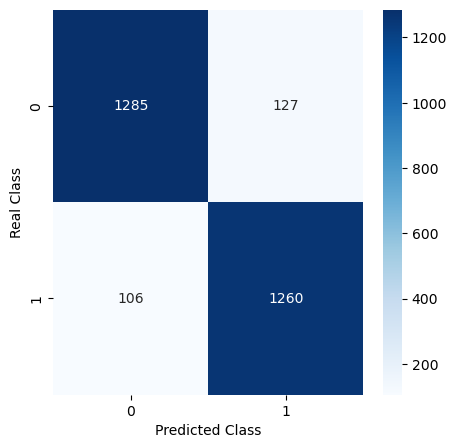

In [28]:
y_pred_rfc=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
print("RandomForestClassifier")
print(classification_report(y_test,y_pred_rfc,digits=4))
cm=confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()



In [29]:
from sklearn.naive_bayes import MultinomialNB
mtnb=MultinomialNB()
mtnb.fit(X_train,y_train)


MultinomialNB()

MultinomialNB
              precision    recall  f1-score   support

           0     0.9238    0.9101    0.9169      1412
           1     0.9084    0.9224    0.9154      1366

    accuracy                         0.9161      2778
   macro avg     0.9161    0.9162    0.9161      2778
weighted avg     0.9162    0.9161    0.9161      2778



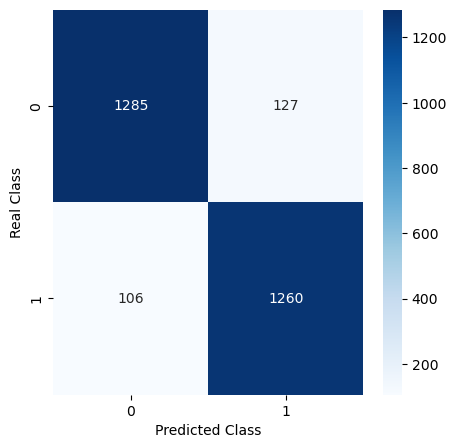

In [30]:
y_pred_mtnb=rfc.predict(X_test)

print("MultinomialNB")
print(classification_report(y_test,y_pred_mtnb,digits=4))
cm=confusion_matrix(y_test,y_pred_mtnb)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

logistic_regression=LogisticRegression()
svm=SVC()
sgdclassifier=SGDClassifier()
dtc=DecisionTreeClassifier()
xgboost=XGBClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
sgdclassifier.fit(X_train, y_train)
dtc.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

models=[logistic_regression,svm,sgdclassifier,dtc,xgboost,gradient_boosting,adaboost]
models_names=["Logistic Regression","SVC","SGD Classifier","Decision Tree Classifier","XG Boosting Classifier",
              "Gradient Boosting Classifier","Ada Boost Classifier"]
for name,model  in zip(models_names,models):
  print(f"----------{name}-------")
  print(f" accuracy_score  {accuracy_score(y_test,model.predict(X_test))}")
  print(f" precision_score  {precision_score(y_test,model.predict(X_test))}")
  print(f" recall_score  {recall_score(y_test,model.predict(X_test))}")
  print(f" f1_score  {f1_score(y_test,model.predict(X_test))}")
  print("\n")






----------Logistic Regression-------
 accuracy_score  0.9193664506839453
 precision_score  0.9107913669064748
 recall_score  0.9267935578330894
 f1_score  0.918722786647315


----------SVC-------
 accuracy_score  0.9298056155507559
 precision_score  0.9197132616487456
 recall_score  0.9392386530014641
 f1_score  0.9293734154291924


----------SGD Classifier-------
 accuracy_score  0.9301655867530597
 precision_score  0.919170243204578
 recall_score  0.9407027818448024
 f1_score  0.9298118668596238


----------Decision Tree Classifier-------
 accuracy_score  0.8801295896328294
 precision_score  0.8772826880934989
 recall_score  0.8792093704245973
 f1_score  0.8782449725776964


----------XG Boosting Classifier-------
 accuracy_score  0.9395248380129589
 precision_score  0.9278571428571428
 recall_score  0.9509516837481699
 f1_score  0.9392624728850326


----------Gradient Boosting Classifier-------
 accuracy_score  0.9146868250539957
 precision_score  0.8906574394463668
 recall_score  0

In [32]:
ensemble=VotingClassifier(estimators=[
            ("svm",svm),("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
],voting="hard")
ensemble.fit(X_train,y_train)


VotingClassifier(estimators=[('svm', SVC()), ('dtc', DecisionTreeClassifier()),
                             ('logistic_regression', LogisticRegression()),
                             ('sgdclassifier', SGDClassifier()),
                             ('adaboost', AdaBoostClassifier()),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stoppin...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                          

--- Ensemble (Voting Classifier) ---
Accuracy: 0.937365010799136
Precision: 0.9197183098591549
Recall: 0.9560761346998536
F1 Score: 0.9375448671931084
              precision    recall  f1-score   support

           0     0.9558    0.9193    0.9372      1412
           1     0.9197    0.9561    0.9375      1366

    accuracy                         0.9374      2778
   macro avg     0.9378    0.9377    0.9374      2778
weighted avg     0.9381    0.9374    0.9374      2778



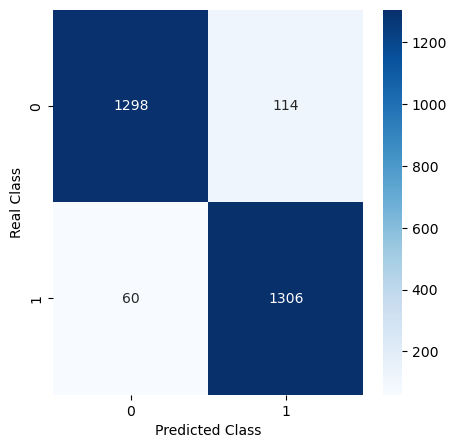

In [33]:
y_pred_ensemble = ensemble.predict(X_test)

print("--- Ensemble (Voting Classifier) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))

print(classification_report(y_test,y_pred_ensemble,digits=4))
cm=confusion_matrix(y_test,y_pred_ensemble)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [34]:
from sklearn.ensemble import StackingClassifier

models_level_0=[
           ("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
            ,("mtnb",mtnb)
]
final_level=SVC()
stacking_classifier=StackingClassifier(
            estimators=models_level_0,
            final_estimator=final_level,
            n_jobs=-1,
           
)
stacking_classifier.fit(X_train,y_train)


StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('logistic_regression', LogisticRegression()),
                               ('sgdclassifier', SGDClassifier()),
                               ('adaboost', AdaBoostClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=Non...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_st

--- Stacking Classifier ---
Accuracy: 0.9496040316774658
Precision: 0.9422799422799423
Recall: 0.9560761346998536
F1 Score: 0.9491279069767441
              precision    recall  f1-score   support

           0     0.9569    0.9433    0.9501      1412
           1     0.9423    0.9561    0.9491      1366

    accuracy                         0.9496      2778
   macro avg     0.9496    0.9497    0.9496      2778
weighted avg     0.9497    0.9496    0.9496      2778



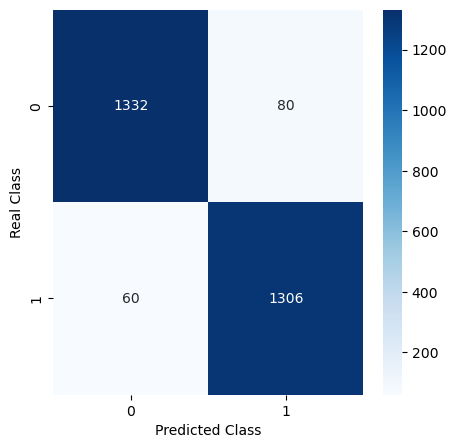

In [35]:
y_pred_stacking = stacking_classifier.predict(X_test)
print("--- Stacking Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking))
print("Recall:", recall_score(y_test, y_pred_stacking))
print("F1 Score:", f1_score(y_test, y_pred_stacking))
print(classification_report(y_test,y_pred_stacking,digits=4))
cm=confusion_matrix(y_test,y_pred_stacking)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()